In [1]:
import nltk as nlp 
from nltk.corpus import brown
import re 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
token=[]
v=[]
for i in brown.categories():
    
     #all words per category
    tokens=brown.words(categories=i)
    
    # count all words per category
    types=nlp.Counter(tokens) 
    
    # list of total no of words according to categories
    token.append(len(tokens)) 
    
    # in this table we get every word with its frequency
    t=pd.DataFrame({'words':list(types.keys()),'frequency':list(types.values())})
    
    # it gives us those words which frequency is 1 i.e. unique words
    vocabulary = t[t['frequency']==1]
    
     # it gives the total no of unique words(per categories)
    v.append(len(vocabulary))
    
# in this table we get total no of words and no of unique words (per category)     
table=pd.DataFrame({'Categories':brown.categories(),'N(Total no of Words)':token,'V(Unique Words)':v})

In [3]:
# our formula is=>log(V(Unique Words))=β*log(N(Total no of Words))+k
#for determine the value of two constants k & β we create two linear equation for per category 
#we create two linear equation like 
#log(V(Unique Words)[1000])=β*log(N(Total no of Words)[1000])+k
#log(V(Unique Words)[3000])=β*log(N(Total no of Words)[3000])+k
# we take first 1000 and 3000 words (per category) and running the below process
token1000=[]
v1000=[]
token3000=[]
v3000=[]
for i in brown.categories():
    
    tokens1=brown.words(categories=i)[0:1000] # take 1st 1000 words
    tokens2=brown.words(categories=i)[0:3000] # take 1st 3000 words
    
     #counting frequency of taken words
    types1=nlp.Counter(tokens1)   
    types2=nlp.Counter(tokens2)
     
    # according to categories store the the total no of words in list 
    # in this case this no are 1000 & 3000
    token1000.append(len(tokens1)) 
    token3000.append(len(tokens2))
    
    # in this table we get every word with its frequency
    # in this case we have 1000 & 3000 words
    
    t1=pd.DataFrame({'words':list(types1.keys()),'frequency':list(types1.values())})
    t2=pd.DataFrame({'words':list(types2.keys()),'frequency':list(types2.values())})
    
    # it gives us those words which frequency is 1 i.e. unique words
    vocabulary1 = t1[t1['frequency']==1]
    vocabulary2 = t2[t2['frequency']==1]
    
    # it gives the total no of unique words(per categories)
    v1000.append(len(vocabulary1)) 
    v3000.append(len(vocabulary2))
    
    
# in this table we get total no of words and no of unique words (per category) 
table1=pd.DataFrame({'Categories':brown.categories(),'N(Total no of Words)(1000)':token1000,
                     'V(Unique Words)(1000)':v1000})
table1.set_index('Categories')
table2=pd.DataFrame({'Categories':brown.categories(),'N(Total no of Words)(3000)':token3000,
                     'V(Unique Words)(3000)':v3000})
table2.set_index('Categories')

#merge two table data (1000 & 3000)
table3=pd.merge(left = table1,right = table2,left_on = 'Categories',right_on = 'Categories')

# our formula is=>log(V(Unique Words))=β*log(N(Total no of Words))+k
# so we take log value per categories in table
table3['log(N(Total no of Words)(3000))']=np.log(table3["N(Total no of Words)(3000)"])
table3['log(N(Total no of Words)(1000))']=np.log(table3["N(Total no of Words)(1000)"])
table3['log(V(Unique Words)(3000))']=np.log(table3["V(Unique Words)(3000)"])
table3['log(V(Unique Words)(1000))']=np.log(table3["V(Unique Words)(1000)"])
table3

,Categories,N(Total no of Words)(1000),V(Unique Words)(1000),N(Total no of Words)(3000),V(Unique Words)(3000),log(N(Total no of Words)(3000)),log(N(Total no of Words)(1000)),log(V(Unique Words)(3000)),log(V(Unique Words)(1000))
0,adventure,1000,262,3000,461,8.006368,6.907755,6.133398,5.568345
1,belles_lettres,1000,325,3000,734,8.006368,6.907755,6.598509,5.783825
2,editorial,1000,383,3000,900,8.006368,6.907755,6.802395,5.948035
3,fiction,1000,325,3000,669,8.006368,6.907755,6.505784,5.783825
4,government,1000,266,3000,541,8.006368,6.907755,6.293419,5.583496
5,hobbies,1000,314,3000,635,8.006368,6.907755,6.453625,5.749393
6,humor,1000,340,3000,799,8.006368,6.907755,6.683361,5.828946
7,learned,1000,220,3000,487,8.006368,6.907755,6.188264,5.393628
8,lore,1000,330,3000,741,8.006368,6.907755,6.608001,5.799093
9,mystery,1000,271,3000,537,8.006368,6.907755,6.285998,5.602119


In [4]:
#now we solve the linear equations (creating matrices)
β=[]
k=[]

#define a function to determine the values
def lineareq(a1,a2,b1,b2):
    A = np.array([[a1,1],[a2,1]])
    B = np.array([b1,b2])
    x=np.linalg.inv(A).dot(B)
    return x

# for per category here created two different linear equation and for per categories we get different values of k & β 
for i in range(0,len(table3)):
    a1=table3['log(N(Total no of Words)(3000))'][i]
    a2=table3['log(N(Total no of Words)(1000))'][i]
    b1=table3['log(V(Unique Words)(3000))'][i]
    b2=table3['log(V(Unique Words)(1000))'][i]
    x= lineareq(a1,a2,b1,b2)
    β.append(x[0])# all β's values per category
    k.append(x[1])# all k's values per category
    
# in this table we reprent all values of  β and k's values per category
g=pd.DataFrame({'Categories':brown.categories(),'β':β,'k':k})

# merge the 1st table(here has all words ) and these values table 
table4=pd.merge(table,g)

# our formula is=>log(V(Unique Words))=β*log(N(Total no of Words))+k
# now we have all values β & log(N(Total no of Words)) & k , so now predict log(V(Unique Words))
table4['log(N(Total no of Words))']=np.log(table4["N(Total no of Words)"])
table4['β*log(N(Total no of Words))']=table4["log(N(Total no of Words))"]*table4['β']
table4['β*log(N(Total no of Words))+k']=table4['β*log(N(Total no of Words))']+table4['k']
table4

,Categories,N(Total no of Words),V(Unique Words),β,k,log(N(Total no of Words)),β*log(N(Total no of Words)),β*log(N(Total no of Words))+k
0,adventure,69342,4933,0.514334,2.015452,11.146806,5.733180,7.748632
1,belles_lettres,173096,9491,0.741557,0.661330,12.061602,8.944367,9.605697
2,editorial,61604,5534,0.777672,0.576069,11.028482,8.576539,9.152608
3,fiction,68488,5251,0.657155,1.244357,11.134414,7.317039,8.561396
4,government,70117,3824,0.646200,1.119707,11.157921,7.210245,8.329952
5,hobbies,82345,6356,0.641020,1.321386,11.318673,7.255491,8.576878
6,humor,21695,3397,0.777722,0.456630,9.984837,7.765431,8.222061
7,learned,181888,7982,0.723309,0.397183,12.111146,8.760106,9.157289
8,lore,110299,7733,0.736300,0.712914,11.610950,8.549140,9.262054
9,mystery,57169,3779,0.622494,1.302084,10.953767,6.818651,8.120736


In [5]:
# we want to predict the value of unique words for per category by Heap's Law
#[V(Unique Words)=exp(log(V(Unique Words)))]
# define exp function
def exp(q):
    E = np.exp(q)
    return E
r=[]

# apply the function through out this table 
for i in range(0,len(table4)):
    q=table4['β*log(N(Total no of Words))+k'][i]
    E= exp(q)
    r.append(int(E))
h=pd.DataFrame({'Categories':brown.categories(),'Pred V(Unique Words)':r})
table5=pd.merge(table,h)
table5

,Categories,N(Total no of Words),V(Unique Words),Pred V(Unique Words)
0,adventure,69342,4933,2318
1,belles_lettres,173096,9491,14849
2,editorial,61604,5534,9439
3,fiction,68488,5251,5225
4,government,70117,3824,4146
5,hobbies,82345,6356,5307
6,humor,21695,3397,3722
7,learned,181888,7982,9483
8,lore,110299,7733,10530
9,mystery,57169,3779,3363


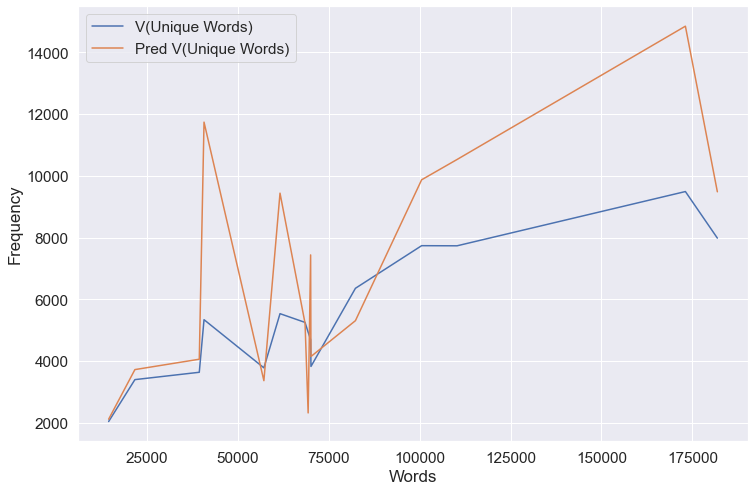

In [6]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.lineplot(x="N(Total no of Words)",y='V(Unique Words)',label='V(Unique Words)',data=table)
sns.lineplot(x="N(Total no of Words)",y='Pred V(Unique Words)',label='Pred V(Unique Words)',data=table5)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()